In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


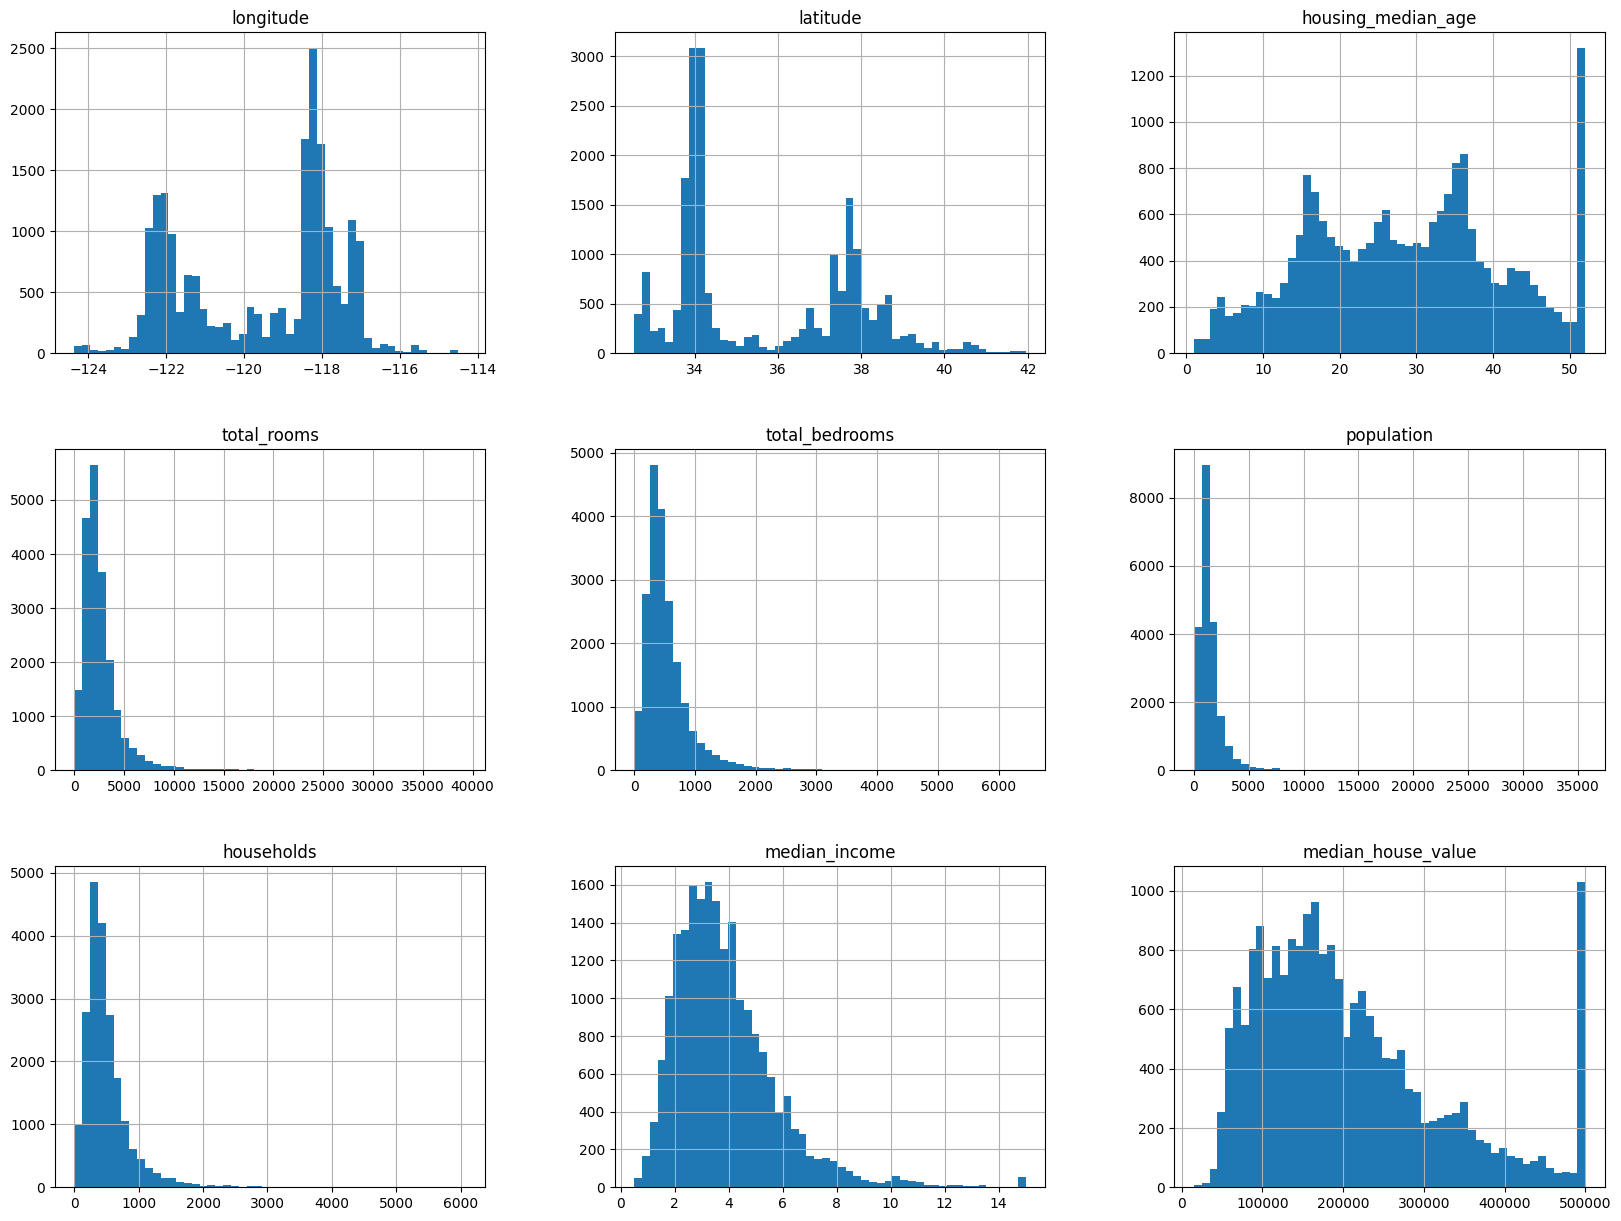

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
def split_train_test(data, split_ratio):
    shuffled_indices = np.random.permutation(len(data))
    print(shuffled_indices[:5])
    test_set_size = int(len(data) * split_ratio)
    print(test_set_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
df_train, df_test = split_train_test(df,0.2)

[ 2379  2008 20542  7061 13346]
4128


In [11]:
df_train.shape

(16512, 10)

In [12]:
df_test.shape

(4128, 10)

In [13]:
# Divide the Numberical columns into Categorical values using Cut() function from pandas.


df['income_cat'] = pd.cut(df['median_income'], bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

<AxesSubplot: >

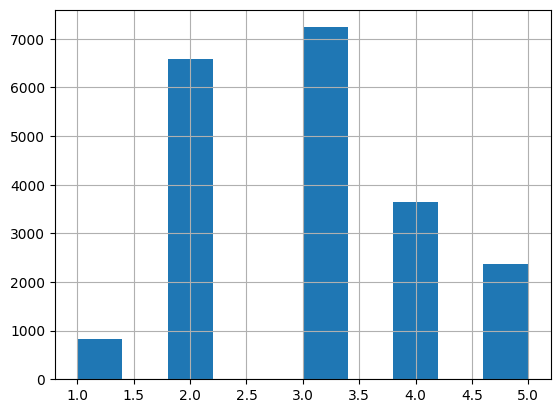

In [14]:
df['income_cat'].hist()

In [15]:
df['income_cat'].value_counts()/len(df['income_cat'])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(df,test_size=0.2, random_state=42)

In [17]:
train_set['income_cat'].value_counts()/len(train_set['income_cat'])

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

In [18]:
test_set['income_cat'].value_counts()/len(test_set['income_cat'])

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [20]:
print(len(strat_train_set))
print(len(strat_test_set))

16512
4128


In [21]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set['income_cat'])

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [22]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set['income_cat'])

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [23]:
for set_  in (strat_test_set,strat_train_set):
    set_.drop("income_cat", axis =1, inplace = True)

In [24]:
strat_train_set.to_excel("Housing_Train_Set.xlsx")

In [25]:
strat_test_set.to_excel("Housing_Test_Set.xlsx")

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

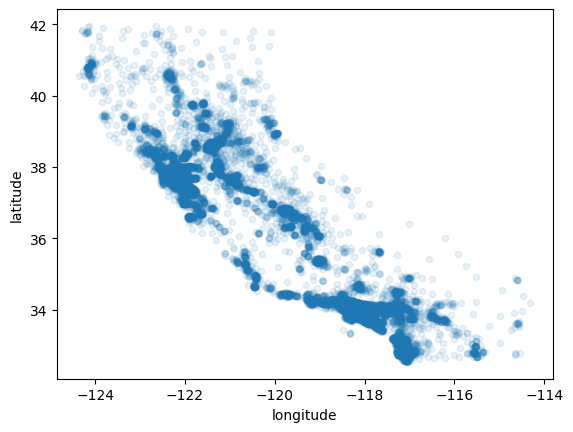

In [26]:
df.plot(kind = 'scatter' , y='latitude', x= 'longitude', alpha=0.1)

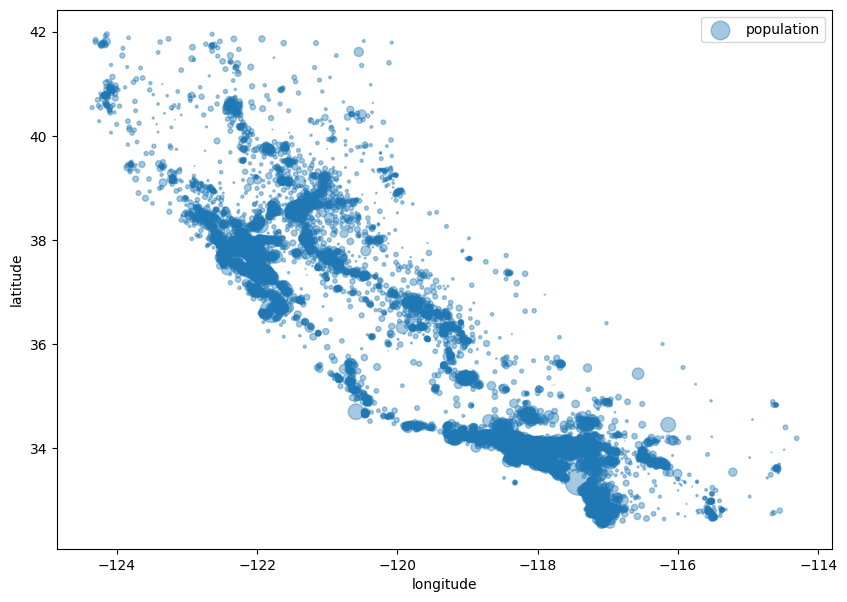

In [27]:
df.plot(kind = 'scatter' , y='latitude', x= 'longitude', alpha=0.4, 
        s=df['population']/100 , label='population', figsize=(10,7),)
       #c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)

plt.legend()

In [30]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [31]:
#Playing with Attributes

corr_matrix = df.corr()

C:\Users\aakas\AppData\Local\Temp\ipykernel_8716\2506069882.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [32]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [33]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [35]:
housing_num = df.drop('ocean_proximity', axis=1)

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
print(imputer.statistics_)
housing_num.median().values

[-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  3.00000000e+00  5.22912879e+00  2.03162434e-01
  2.81811565e+00]


C:\Users\aakas\AppData\Local\Temp\ipykernel_8716\2374318761.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_num.median().values


array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [38]:
x = housing_num.values

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('Imputer',SimpleImputer(strategy='median')),
                        ('Scaler',StandardScaler())])

In [40]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -1.14993031, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.99038135, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -1.44586501, -0.02584253],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
         0.03870567, -0.0717345 ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
         0.12050112, -0.09122515],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
         0.14290124, -0.04368215]])

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_Attr = list(housing_num)
cat_Attr = ['ocean_proximity']

In [43]:
full_pipeline = ColumnTransformer([("num", num_pipeline, num_Attr),
                                  ('cat', OneHotEncoder(), cat_Attr),])

In [44]:
housing_prepared = full_pipeline.fit_transform(df)

In [45]:
housing_prepared.shape

(20640, 18)

In [57]:
df.population.max()

35682.0

<AxesSubplot: >

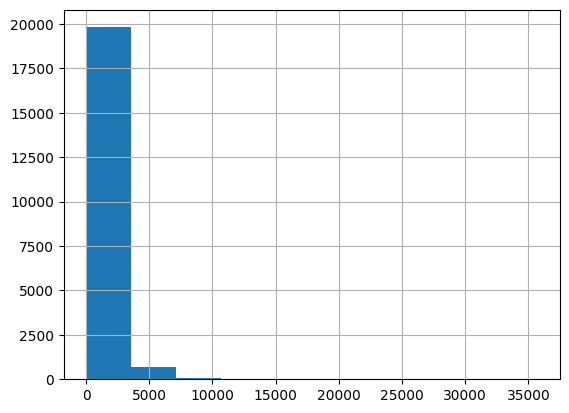

In [63]:
df['population'].hist()

<AxesSubplot: >

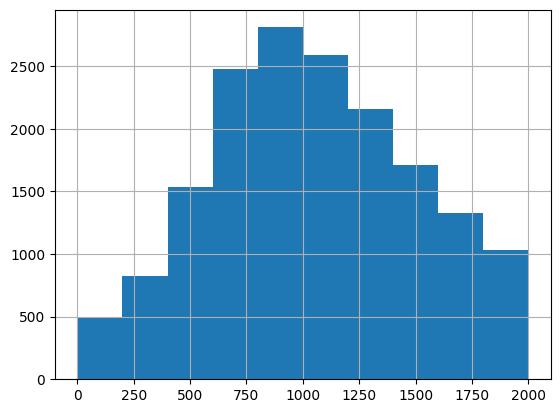

In [61]:
df['population'].hist(range=[0,2000])

In [72]:
l = np.log(df.population)

(array([  5.,  10.,  21.,  33., 153., 620., 791., 294.,  63.,  10.]),
 array([2.89037176, 3.54227829, 4.19418483, 4.84609136, 5.4979979 ,
        6.14990443, 6.80181096, 7.4537175 , 8.10562403, 8.75753057,
        9.4094371 ]),
 <BarContainer object of 10 artists>)

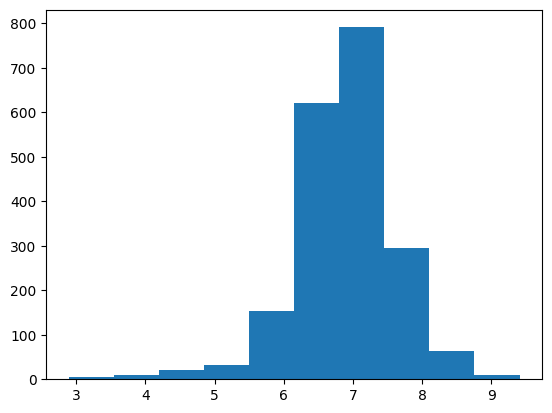

In [73]:
plt.hist(l[:2000])

<AxesSubplot: >

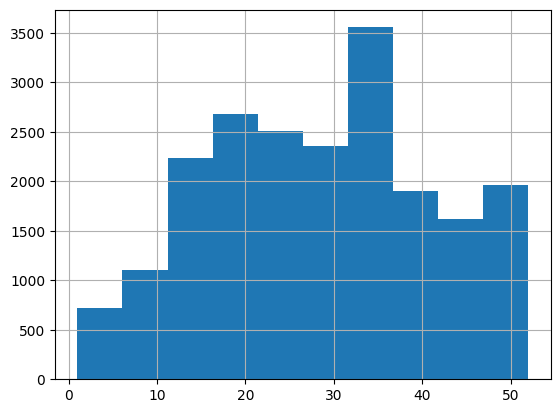

In [74]:
df['housing_median_age'].hist()

In [75]:
from sklearn.metrics.pairwise import rbf_kernel

In [81]:
age_simil_35 = rbf_kernel(df[['housing_median_age']], [[35]], gamma=0.1)

(array([15327.,     0.,   827.,     0.,   959.,     0.,  1152.,     0.,
            0.,  2375.]),
 array([6.24536596e-51, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

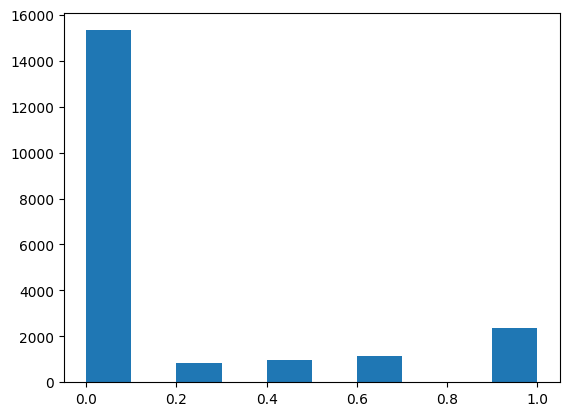

In [83]:
plt.hist(age_simil_35)